In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NG_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,NaN,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,NaN,2.0,3.0,NaN,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,NaN,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN
679,2.0,NaN,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4.0,10.0,NaN,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	32
float64		column 2	48
float64		column 3	66
float64		column 4	80
float64		column 5	66
float64		column 6	82
float64		column 7	64
float64		column 8	64
float64		column 9	82


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,651.000000,635.000000,617.000000,603.000000,617.000000,601.000000,619.000000,619.000000,601.000000
mean,4.427035,3.122835,3.228525,2.840796,3.222042,3.459235,3.441034,2.814216,1.552413
std,2.804744,3.032011,2.958802,2.850283,2.190068,3.574272,2.396261,2.979334,1.656602
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

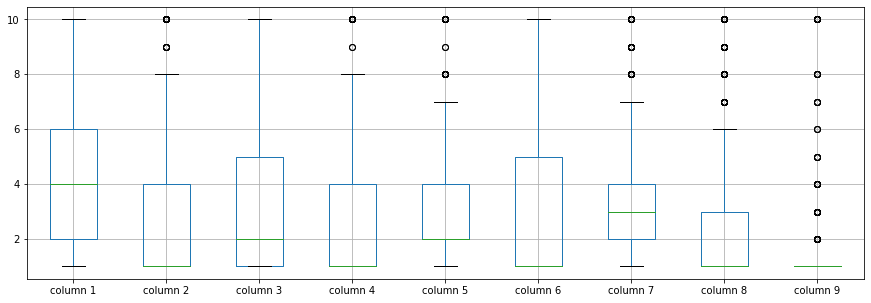

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.427035
column 2    3.122835
column 3    3.228525
column 4    2.840796
column 5    3.222042
column 6    3.459235
column 7    3.441034
column 8    2.814216
column 9    1.552413
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.631343,0.640611,0.479834,0.531138,0.558579,0.555083,0.538750,0.337230
column 2,0.631343,1.000000,0.907130,0.728346,0.756148,0.682253,0.737343,0.712654,0.478054
column 3,0.640611,0.907130,1.000000,0.676018,0.731927,0.708664,0.708037,0.707692,0.447372
column 4,0.479834,0.728346,0.676018,1.000000,0.608963,0.663203,0.656575,0.586493,0.411671
column 5,0.531138,0.756148,0.731927,0.608963,1.000000,0.580114,0.625141,0.604313,0.507757
column 6,0.558579,0.682253,0.708664,0.663203,0.580114,1.000000,0.687525,0.565529,0.332765
column 7,0.555083,0.737343,0.708037,0.656575,0.625141,0.687525,1.000000,0.633663,0.304411
column 8,0.538750,0.712654,0.707692,0.586493,0.604313,0.565529,0.633663,1.000000,0.419109
column 9,0.337230,0.478054,0.447372,0.411671,0.507757,0.332765,0.304411,0.419109,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+21,9+21+21,9+21+21,9+21+21+21+21,9+21+21+21+21+21,9+21+21+21+21+21+21,9+21+21+21+21+21,9+21+21+21+21,9+21+21+21,9+21+21,9+21,9], vae_layer = False, seed = 210)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 33.24107687813895
Epoch: 1 , loss: 32.777127220517116
Epoch: 2 , loss: 32.974291392735076
Epoch: 3 , loss: 32.76962407430013
Epoch: 4 , loss: 32.13020351954869
Epoch: 5 , loss: 29.294586090814498
Epoch: 6 , loss: 28.23140898204985
Epoch: 7 , loss: 27.607134228660946
Epoch: 8 , loss: 27.14616789136614
Epoch: 9 , loss: 27.175222896394274
Epoch: 10 , loss: 26.982061340695335
Epoch: 11 , loss: 26.630564735049294
Epoch: 12 , loss: 26.24973910195487
Epoch: 13 , loss: 26.08315640404111
Epoch: 14 , loss: 25.482259614127024
Epoch: 15 , loss: 25.55529226575579
Epoch: 16 , loss: 25.39214681443714
Epoch: 17 , loss: 25.321130525498162
Epoch: 18 , loss: 25.288243566240585
Epoch: 19 , loss: 25.24833651951381
Epoch: 20 , loss: 25.32282064074562
Epoch: 21 , loss: 24.930872826349166
Epoch: 22 , loss: 24.749290080297563
Epoch: 23 , loss: 24.999472822461808
Epoch: 24 , loss: 25.44106086095174
Epoch: 25 , loss: 24.744054385

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.0,0.0,0.000000,1.246336,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,-7.317980,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,-1.132942,0.000000,0.000000,-0.253853,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,2.174902,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.0,0.394383,0.0,0.0,-0.560231,0.000000,-0.471027,0.000000,-0.317468
679,0.0,-0.022972,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
680,0.0,0.000000,0.0,0.0,0.000000,0.000000,-2.945732,0.000000,0.000000
681,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(82.37838167249225, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.24566494049946777

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.0,1.0,2.000000,2.246336,3.000000,1.000000,1.000000
1,5.0,4.000000,4.0,5.0,7.000000,2.682020,3.000000,2.000000,1.000000
2,3.0,1.000000,1.0,1.0,0.867058,2.000000,3.000000,0.746147,1.000000
3,6.0,8.000000,8.0,1.0,3.000000,4.000000,3.000000,7.000000,1.000000
4,4.0,1.000000,1.0,3.0,2.000000,3.174902,3.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,3.0,1.394383,1.0,1.0,1.439769,1.000000,1.528973,1.000000,0.682532
679,2.0,0.977028,1.0,1.0,2.000000,1.000000,3.000000,1.000000,1.000000
680,5.0,10.000000,10.0,10.0,4.000000,10.000000,2.054268,6.000000,3.000000
681,1.0,1.000000,1.0,3.0,2.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NG_10(imp).xlsx", index=False, header=False)